In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
df = pd.read_excel(r"C:/Users/chaud/Downloads/flight_price (1).xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
#date_of_journey data extraction
df["Date"] = df["Date_of_Journey"].str.split('/').str[0]
df["month"] = df["Date_of_Journey"].str.split('/').str[1]
df["year"] = df["Date_of_Journey"].str.split('/').str[2]

df["Date"] = df["Date"].astype(int)
df["month"] = df["month"].astype(int)
df["year"] = df["year"].astype(int)

In [7]:
#duration column 
df["Duration_hour"] = df["Duration"].str.extract(r'(\d+)h').fillna(0)
df["Duration_minute"] = df["Duration"].str.extract(r'(\d+)m').fillna(0)

df["Duration_hour"] = df["Duration_hour"].astype(int)
df["Duration_minute"] = df["Duration_minute"].astype(int)



In [8]:
#departure column
df["Dep_hour"] = df["Dep_Time"].str.split(':').str[0]
df["Dep_min"] = df["Dep_Time"].str.split(':').str[1]

df["Dep_min"] = df["Dep_min"].astype(int)
df["Dep_hour"] = df["Dep_hour"].astype(int)

In [9]:
#Arrival_Time
df["Arrival_hour"] = df["Arrival_Time"].str.extract(r'(\d+):').fillna(0)
df["Arrival_min"] = df["Arrival_Time"].str.extract(r'(\d+):').fillna(0)

df["Arrival_hour"] = df["Arrival_hour"].astype(int)
df["Arrival_min"]  = df["Arrival_min"].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  month            10683 non-null  int32 
 13  year             10683 non-null  int32 
 14  Duration_hour    10683 non-null  int32 
 15  Duration_minute  10683 non-null  int32 
 16  Dep_hour         10683 non-null  int32 
 17  Dep_min          10683 non-null

In [11]:
df.drop(["Date_of_Journey","Route","Dep_Time","Arrival_Time","Duration",],axis = 1 ,inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Date             10683 non-null  int32 
 7   month            10683 non-null  int32 
 8   year             10683 non-null  int32 
 9   Duration_hour    10683 non-null  int32 
 10  Duration_minute  10683 non-null  int32 
 11  Dep_hour         10683 non-null  int32 
 12  Dep_min          10683 non-null  int32 
 13  Arrival_hour     10683 non-null  int32 
 14  Arrival_min      10683 non-null  int32 
dtypes: int32(9), int64(1), object(5)
memory usage: 876.5+ KB


In [13]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,year,Duration_hour,Duration_minute,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,2,50,22,20,1,1
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,7,25,5,50,13,13
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,19,0,9,25,4,4
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,5,25,18,5,23,23
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,4,45,16,50,21,21


In [14]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
month              0
year               0
Duration_hour      0
Duration_minute    0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
dtype: int64

In [15]:
df[df["Total_Stops"].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,year,Duration_hour,Duration_minute,Dep_hour,Dep_min,Arrival_hour,Arrival_min
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,5,2019,23,40,9,45,9,9


In [16]:
mode_value = df["Total_Stops"].mode()[0]
df["Total_Stops"] = df["Total_Stops"].fillna(mode_value)
df[df["Total_Stops"].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,year,Duration_hour,Duration_minute,Dep_hour,Dep_min,Arrival_hour,Arrival_min


In [17]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,year,Duration_hour,Duration_minute,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,2,50,22,20,1,1
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,7,25,5,50,13,13
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,19,0,9,25,4,4
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,5,25,18,5,23,23
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,4,45,16,50,21,21


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10683 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Date             10683 non-null  int32 
 7   month            10683 non-null  int32 
 8   year             10683 non-null  int32 
 9   Duration_hour    10683 non-null  int32 
 10  Duration_minute  10683 non-null  int32 
 11  Dep_hour         10683 non-null  int32 
 12  Dep_min          10683 non-null  int32 
 13  Arrival_hour     10683 non-null  int32 
 14  Arrival_min      10683 non-null  int32 
dtypes: int32(9), int64(1), object(5)
memory usage: 876.5+ KB


In [19]:
#checking unique values 
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [20]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [21]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [22]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [23]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [24]:
#Price Analysis:

#!How do flight prices vary across different airlines?
airline_summary = df.groupby("Airline")["Price"].describe()
airline_summary

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Air Asia,319.0,5590.260188,2027.362290,3383.0,4282.0,5162.0,6451.00,13774.0
Air India,1752.0,9611.210616,3900.952942,2050.0,6896.0,9443.0,12219.00,31945.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
SpiceJet,818.0,4338.284841,1849.922514,1759.0,3574.5,3873.0,4760.00,23267.0


c:\Users\chaud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chaud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chaud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chaud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: ylabel='Count'>

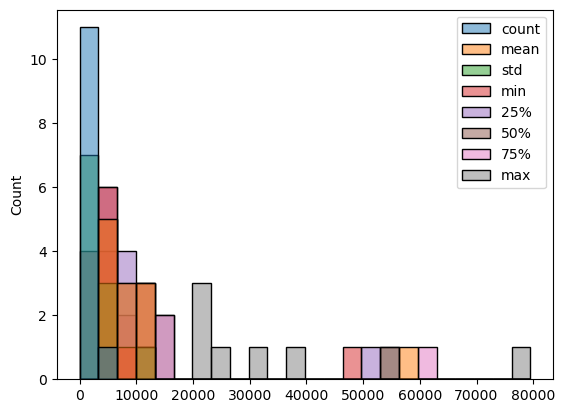

In [25]:
sns.histplot(airline_summary)

In [26]:
#What is the average flight price by source or destination?
source_price_summary = df.groupby("Source")["Price"].mean()
source_price_summary

#Delhi -10539.439057 it is expensive than others 

Source
Banglore     8017.464269
Chennai      4789.892388
Delhi       10539.439057
Kolkata      9158.389411
Mumbai       5059.708752
Name: Price, dtype: float64

In [27]:
#destination 
destination_price_summary = df.groupby("Destination")["Price"].mean()
destination_price_summary

#New Delhi flight is exapensive


Destination
Banglore      9158.389411
Cochin       10539.439057
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata       4789.892388
New Delhi    11917.716738
Name: Price, dtype: float64

In [28]:
df["Destination"] = df["Destination"].replace(
    {"New Delhi":"Delhi Region","Delhi":"Delhi Region"}
)
price_summary = df.groupby(["Source","Destination"])["Price"].mean().unstack()
price_summary

Destination,Banglore,Cochin,Delhi Region,Hyderabad,Kolkata
Source,,,,,
Banglore,NaN,NaN,8017.464269,NaN,NaN
Chennai,NaN,NaN,NaN,NaN,4789.892388
Delhi,NaN,10539.439057,NaN,NaN,NaN
Kolkata,9158.389411,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,5059.708752,NaN


A flight travelling from Delhi to Cochin have highest average pricing 10539.439057

In [29]:
#Is there a relationship between the number of stops (Total_Stops) and the flight price?
stop_price_summary = df.groupby("Total_Stops")["Price"].mean()
stop_price_summary

Total_Stops
1 stop      10593.570032
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
non-stop     5024.900315
Name: Price, dtype: float64

In [37]:
#How do flight prices change over different months or years? Are there seasonal trends?
seasonal_trends = df.groupby(["year","month","Date"])["Price"].mean()
print(seasonal_trends)

year  month  Date
2019  3      1       19517.849246
             3       12033.615873
             6       13975.727047
             9       10391.784768
             12      11607.154930
             15       7137.796296
             18       8926.858974
             21       8011.418440
             24       8755.755418
             27       7406.575251
      4      1        7448.124514
             3        4395.163636
             6        4805.360000
             9        6462.984000
             12       5124.031746
             15       5126.101124
             18       5344.940299
             21       5573.000000
             24       4965.500000
             27       5209.989362
      5      1        8692.072202
             3        4671.255556
             6        8720.407801
             9        9763.592975
             12       8522.447876
             15       8771.612346
             18       9860.662698
             21       9845.796781
             24       8777.720

In [ ]:
#monthly-trend
monthly_trends = df.groupby(["month","year"])["Price"].mean().unstack()
monthly_trends

year,2019
month,
3,10673.205580
4,5770.847081
5,9127.247548
6,8828.796134


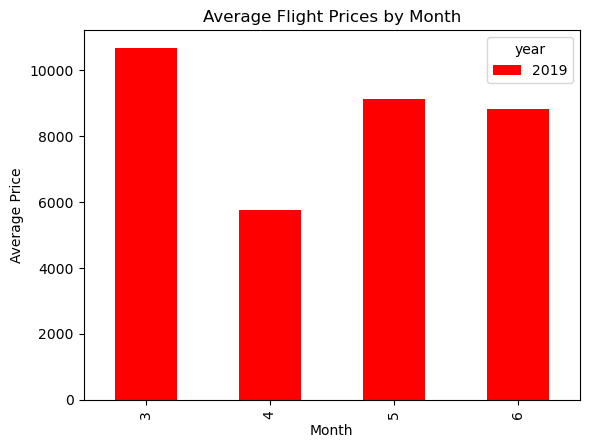

In [ ]:
monthly_trends.plot(kind='bar', color="Red")
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

In year 2019 Month 3 have highest average pricing of flights (10673.205580) in compare to other months.

In [ ]:
#yearly-trend
yearly_trends = df.groupby("year")["Price"].mean()
yearly_trends

year
2019    9087.064121
Name: Price, dtype: float64

Year 2019 have 9087.064121 as Average pricing of flights 

In [ ]:
#How does the time of departure or arrival (using Dep_hour, Dep_min, Arrival_hour, Arrival_min) affect the price or duration?
dep_arrival = df.groupby(["Dep_hour","Dep_min","Arrival_min","Arrival_hour"])["Price"].mean()
dep_arrival

Dep_hour  Dep_min  Arrival_min  Arrival_hour
0         20       4            4               13438.500000
                   7            7               13977.000000
                   12           12              18260.000000
                   13           13              29528.000000
                   15           15              23170.000000
                                                    ...     
23        25       2            2                5741.125000
          30       2            2                4907.400000
                   4            4                9802.916667
                   7            7                6860.875000
          55       2            2                4568.800000
Name: Price, Length: 1049, dtype: float64

In [ ]:
#How do the flight durations (using Duration_hour and Duration_minute) compare among different airlines?
airline_duration_summary = df.groupby("Airline")[["Duration_hour","Duration_minute"]].mean()
airline_duration_summary

,Duration_hour,Duration_minute
Airline,,
Air Asia,5.194357,36.614420
Air India,15.269977,27.054795
GoAir,4.371134,36.701031
IndiGo,4.215295,32.489040
Jet Airways,13.721746,26.428943
Jet Airways Business,6.000000,26.666667
Multiple carriers,10.051839,22.658863
Multiple carriers Premium economy,9.692308,25.000000
SpiceJet,2.462103,30.757946


Air India takes more Duration then other airlines.

Vistara Premium economy	takes less duration then other airlines. It is good for emergency meetings etc.


In [ ]:
#Is there any correlation between the flight duration and the flight price?
df["Full_dur_minu"] = df["Duration_hour"] * 60 +df["Duration_minute"]

data = df[["Full_dur_minu","Price"]]

correlation = data.corr()
correlation

,Full_dur_minu,Price
Full_dur_minu,1.000000,0.506371
Price,0.506371,1.000000


Yes correlation between the flight duration and the flight price exist

<Axes: >

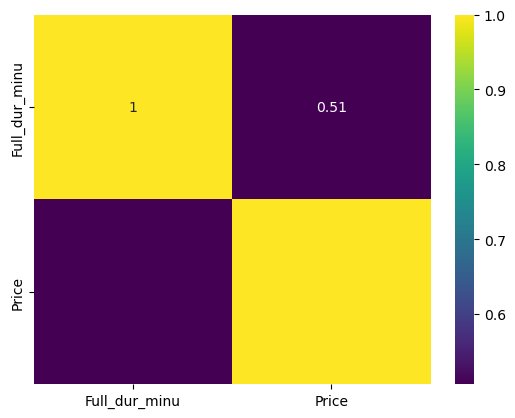

In [ ]:
sns.heatmap(data = correlation ,
            cmap = "viridis",
            annot = True)

In [ ]:
#How do direct flights  compare in price and duration to flights with one or more stops?
flights_summary = df.groupby("Total_Stops")[["Price","Full_dur_minu"]].mean()
flights_summary

,Price,Full_dur_minu
Total_Stops,,
1 stop,10593.570032,782.053857
2 stops,12715.807895,1233.539474
3 stops,13112.000000,1547.444444
4 stops,17686.000000,1770.000000
non-stop,5024.900315,150.084503


Direct flights have less price and duration then flights with one or more stops

In [ ]:
#Does the Additional_Info column (which might include details like delays or other special conditions) have any noticeable impact on flight price or duration?
adition_summary = df.groupby("Additional_Info")[["Price","Full_dur_minu"]].describe()
adition_summary           

Price                                       \
                               count          mean           std      min   
Additional_Info                                                             
1 Long layover                  19.0  22109.631579   8040.051155   7744.0   
1 Short layover                  1.0  26743.000000           NaN  26743.0   
2 Long layover                   1.0  26480.000000           NaN  26480.0   
Business class                   4.0  56811.250000  21381.667044  28097.0   
Change airports                  7.0  16800.714286   4449.728371  13366.0   
In-flight meal not included   1982.0   9471.834511   2812.043362   1840.0   
No Info                          3.0   8044.666667    119.181934   7917.0   
No check-in baggage included   320.0   3645.156250    865.712619   1965.0   
No info                       8345.0   9141.320192   4714.100152   1759.0   
Red-eye flight                   1.0  10873.000000           NaN  10873.0   

                                                                   \
                                  25%      50%       75%      max   
Additional_Info                                                     
1 Long layover                14673.0  25735.0  27992.00  31825.0   
1 Short layover               26743.0  26743.0  26743.00  26743.0   
2 Long layover                26480.0  26480.0  26480.00  26480.0   
Business class                49931.0  59818.0  66698.25  79512.0   
Change airports               13940.5  15119.0  17573.50  26092.0   
In-flight meal not included    7757.0  10262.0  10844.00  19644.0   
No Info                        7990.5   8064.0   8108.50   8153.0   
No check-in baggage included   3543.0   3841.0   3859.00   6356.0   
No info                        5224.0   8016.0  12970.00  54826.0   
Red-eye flight                10873.0  10873.0  10873.00  10873.0   

                             Full_dur_minu                                   \
                                     count         mean         std     min   
Additional_Info                                                               
1 Long layover                        19.0   919.473684  300.031918   485.0   
1 Short layover                        1.0   875.000000         NaN   875.0   
2 Long layover                         1.0  1600.000000         NaN  1600.0   
Business class                         4.0   352.500000   55.000000   280.0   
Change airports                        7.0   960.714286  499.478299   435.0   
In-flight meal not included         1982.0   847.093845  492.489330    80.0   
No Info                                3.0   280.000000   18.027756   260.0   
No check-in baggage included         320.0   147.531250   38.683252    80.0   
No info                             8345.0   612.933493  501.472626     5.0   
Red-eye flight                         1.0   165.000000         NaN   165.0   

                                                              
                                 25%     50%     75%     max  
Additional_Info                                               
1 Long layover                 677.5   890.0  1127.5  1510.0  
1 Short layover                875.0   875.0   875.0   875.0  
2 Long layover                1600.0  1600.0  1600.0  1600.0  
Business class                 325.0   365.0   392.5   400.0  
Change airports                647.5   725.0  1250.0  1770.0  
In-flight meal not included    450.0   800.0  1285.0  2315.0  
No Info                        272.5   285.0   290.0   295.0  
No check-in baggage included   135.0   150.0   160.0   270.0  
No info                        170.0   475.0   875.0  2860.0  
Red-eye flight                 165.0   165.0   165.0   165.0

Price Analysis

1.Business Class has the highest mean price (₹56811.25) with a wide range (min: ₹28097, max: ₹79512), indicating premium pricing.

2.No check-in baggage included is the cheapest (₹3645.16 on average), targeting budget travelers.

3.In-flight meal not included is also relatively cheaper (₹9471.83 on average), howing cost-saving strategies by airlines.

4.No info has a high standard deviation (₹4714.10), indicating variable pricing likely due to diverse flight conditions or last-minute bookings.



Duration Analysis

1.2 Long layover has the highest mean duration (1600 mins ≈ 26.67 hours), consistent with long waiting periods between connecting flights.

2.Business class has the shortest mean duration (352.5 mins ≈ 5.88 hours), reflecting faster, more direct routes.

3.No check-in baggage included and No info have shorter durations on average (147.53 mins and 612.93 mins, respectively), likely representing short-haul or domestic flights.
